In [1]:
'''
Activity 5
'''

#Loading the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Reading the Boston housing data frame
boston_df = pd.read_csv('Boston_housing.csv')



In [2]:
#Checking the first 10 records with head() then getting the total number of records
boston_df.head(10)
boston_df.shape

(506, 14)

In [3]:
#Smaller data frame that does not include CHAS, NOX, B, and LSTAT
new_df = boston_df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']]

#Checking last 7 records of the new data frame
new_df.tail(7)


,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


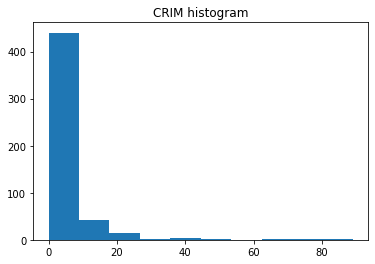

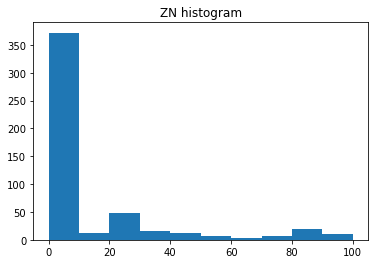

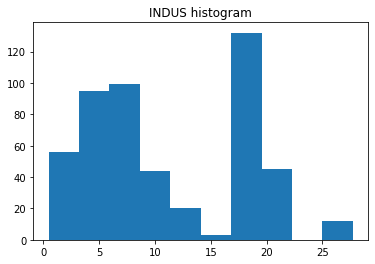

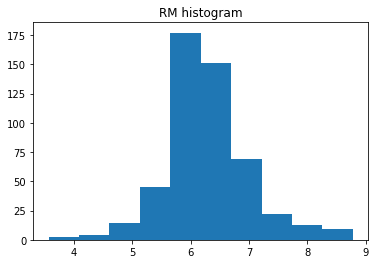

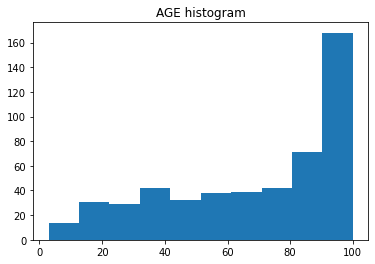

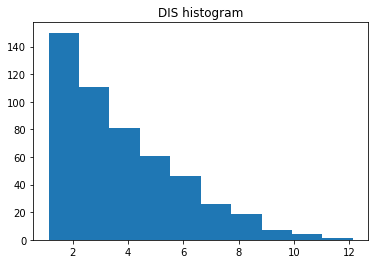

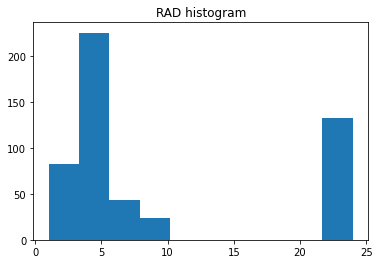

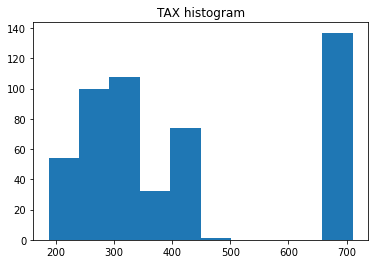

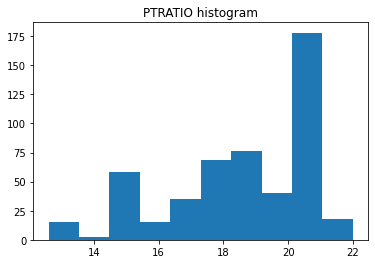

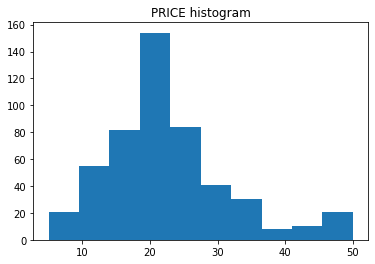

In [4]:
#Plotting histograms of each column in the new data frame
plt.hist(new_df['CRIM'])
plt.title('{} histogram'.format('CRIM'))
plt.show()

plt.hist(new_df['ZN'])
plt.title('{} histogram'.format('ZN'))
plt.show()

plt.hist(new_df['INDUS'])
plt.title('{} histogram'.format('INDUS'))
plt.show()

plt.hist(new_df['RM'])
plt.title('{} histogram'.format('RM'))
plt.show()

plt.hist(new_df['AGE'])
plt.title('{} histogram'.format('AGE'))
plt.show()

plt.hist(new_df['DIS'])
plt.title('{} histogram'.format('DIS'))
plt.show()

plt.hist(new_df['RAD'])
plt.title('{} histogram'.format('RAD'))
plt.show()

plt.hist(new_df['TAX'])
plt.title('{} histogram'.format('TAX'))
plt.show()

plt.hist(new_df['PTRATIO'])
plt.title('{} histogram'.format('PTRATIO'))
plt.show()

plt.hist(new_df['PRICE'])
plt.title('{} histogram'.format('PRICE'))
plt.show()

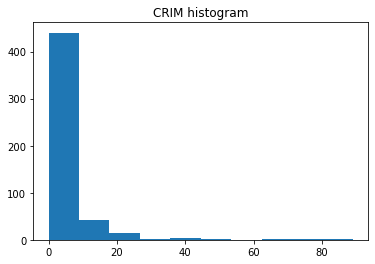

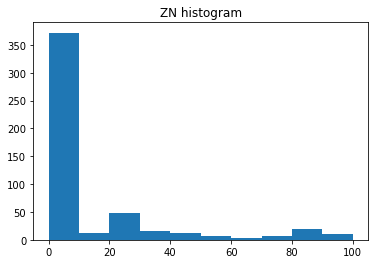

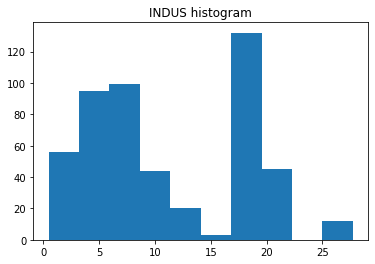

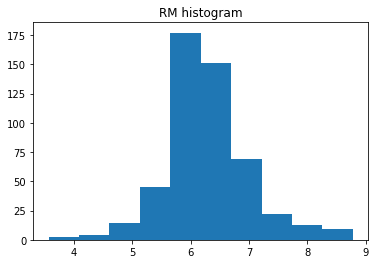

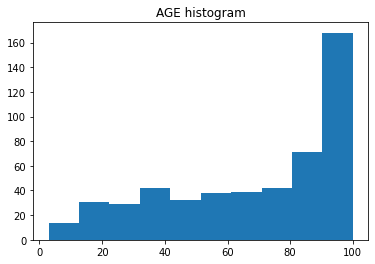

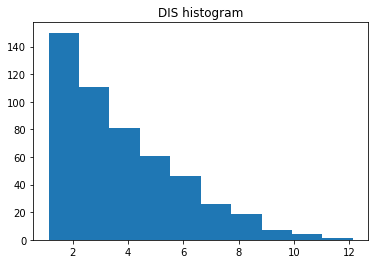

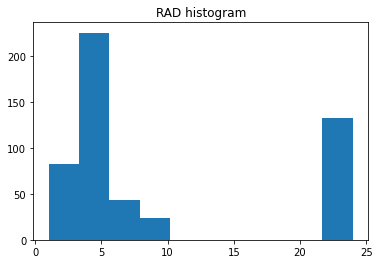

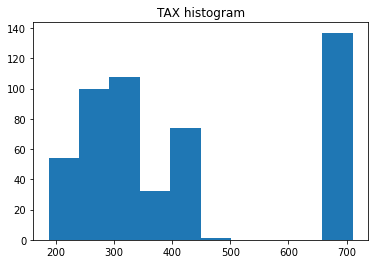

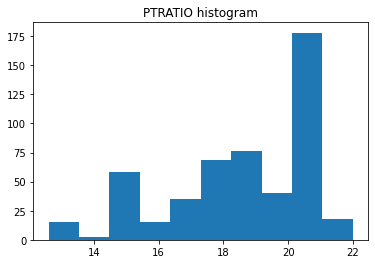

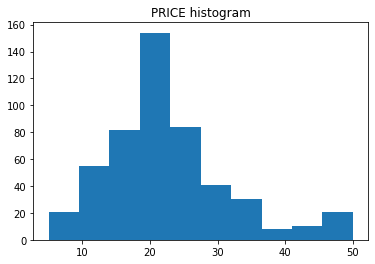

In [5]:
#Plotting histograms of each column all at once using a for loop
for names in new_df.columns:
    plt.hist(new_df[names])
    plt.title('{} histogram'.format(names))
    plt.show()

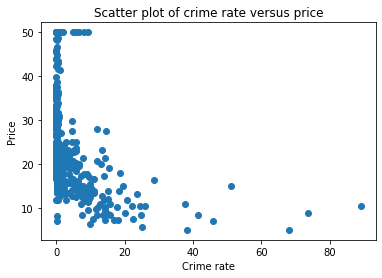

In [6]:
#Plotting a scatter plot of crime rate versus price
plt.scatter(new_df['CRIM'], new_df['PRICE'])
plt.title('Scatter plot of crime rate versus price')
plt.xlabel('Crime rate')
plt.ylabel('Price')
plt.show()

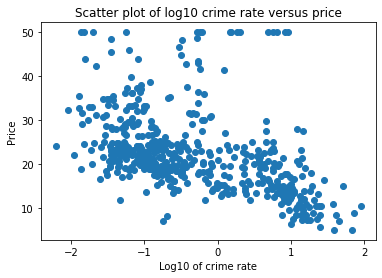

In [7]:
#Plotting log10 of crime versus price
plt.scatter(np.log10(new_df['CRIM']), new_df['PRICE'])
plt.title('Scatter plot of log10 crime rate versus price')
plt.xlabel('Log10 of crime rate')
plt.ylabel('Price')
plt.show()

In [8]:
#Calculating some useful statistics

#Mean rooms per dwelling
print('Mean rooms per dwelling: {}'.format(new_df['RM'].mean()))

#Median age
print('Median age: {}'.format(new_df['AGE'].median()))

#Mean distances to five Boston employment centers
print('Mean distance to five Boston employment centers: {}'.format(new_df['DIS'].mean()))

#Percentage of houses below $20,000
percent_low = np.mean(new_df['PRICE'] < 20) * 100
print('Percent of houses below $20,000: {}'.format(percent_low))

Mean rooms per dwelling: 6.284634387351788
Median age: 77.5
Mean distance to five Boston employment centers: 3.795042687747034
Percent of houses below $20,000: 41.50197628458498


In [9]:
'''
Activity 6
'''

#Loading the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Reading the adult income data frame
adult_income_df = pd.read_csv('adult_income_data.csv')
adult_income_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [10]:
#Making a script that will read the text file line by line to obtain the column names
with open('adult_income_names.txt', 'r') as fd:
    cleaned_titles = []
    for line in fd:
        #For each line in the file, reads the line, splits it by colon, then takes 
        #the first element of the split, which is the title, and appends it to an empty list
        fd.readline()
        split_lines = line.split(':')
        name = split_lines[0]
        cleaned_titles.append(name)
print('Column titles: {}'.format(cleaned_titles))

#Adding the name Income to the dataset
cleaned_titles.append('Income')

Column titles: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [11]:
#Finding the missing values by first loading only the columns of the cleaned titles, then 
#using isnull() to find any missing values, then using sum() to add the number of True values
short_df = pd.read_csv('adult_income_data.csv', names = cleaned_titles)
short_df.head()
missing = short_df.isnull()
number_of_missing_values = missing.sum()
print('Missing values for each column: \n{}'.format(number_of_missing_values))

#Using subsetting to make a data frame of only age, education, and occupation
shorter_df = short_df[['age', 'education', 'occupation']]

Missing values for each column: 
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64


Text(0, 0.5, 'Frequency')

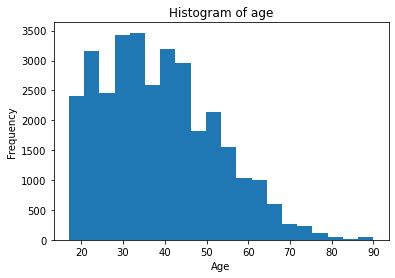

In [12]:
#Plotting a histogram of age with a bin size of 20
plt.hist(shorter_df['age'], bins = 20)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [13]:
#Making a function to strip whitespace characters
def no_whitespace(string):
    return string.strip()

In [14]:
#Using the apply() method to apply the above function to all string columns and stores the new values into a new column.
#The new column is then copied into the old column, and the new column is then deleted. In this case, there are only 
#two string columns, education and occupation.
shorter_df['education_new'] = shorter_df['education'].apply(no_whitespace)
shorter_df['education'] = shorter_df['education_new']
shorter_df.drop(labels = ['education_new'], axis = 1, inplace = True)

shorter_df['occupation_new'] = shorter_df['occupation'].apply(no_whitespace)
shorter_df['occupation'] = shorter_df['occupation_new']
shorter_df.drop(labels = ['occupation_new'], axis = 1, inplace = True)

shorter_df.head()

<ipython-input-14-75b46ac5ff6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorter_df['education_new'] = shorter_df['education'].apply(no_whitespace)
<ipython-input-14-75b46ac5ff6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorter_df['education'] = shorter_df['education_new']
C:\Users\PS3ma\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [15]:
#Finding the number of people aged between 30 and 50
df_age = shorter_df[(shorter_df['age'] >= 30) & (shorter_df['age'] <= 50)]
df_age.head()

print('Number of ages between 30 and 50: {}'.format(df_age.shape[0]))

Number of ages between 30 and 50: 16390


In [16]:
#Grouping the records based on age and education to find out how the mean age is distributed

shorter_df.groupby('age').describe()
shorter_df.groupby('education').describe()

age                                                     
                count       mean        std   min    25%   50%   75%   max
education                                                                 
10th            933.0  37.429796  16.720713  17.0  22.00  34.0  52.0  90.0
11th           1175.0  32.355745  15.545485  17.0  18.00  28.0  43.0  90.0
12th            433.0  32.000000  14.334625  17.0  19.00  28.0  41.0  79.0
1st-4th         168.0  46.142857  15.615625  19.0  33.00  46.0  57.0  90.0
5th-6th         333.0  42.885886  15.557285  17.0  29.00  42.0  54.0  84.0
7th-8th         646.0  48.445820  16.092350  17.0  34.25  50.0  61.0  90.0
9th             514.0  41.060311  15.946862  17.0  28.00  39.0  54.0  90.0
Assoc-acdm     1067.0  37.381443  11.095177  19.0  29.00  36.0  44.0  90.0
Assoc-voc      1382.0  38.553546  11.631300  19.0  30.00  37.0  46.0  84.0
Bachelors      5355.0  38.904949  11.912210  19.0  29.00  37.0  46.0  90.0
Doctorate       413.0  47.702179  11.784716  24.0  39.00  47.0  55.0  80.0
HS-grad       10501.0  38.974479  13.541524  17.0  28.00  37.0  48.0  90.0
Masters        1723.0  44.049913  11.068935  18.0  36.00  43.0  51.0  90.0
Preschool        51.0  42.764706  15.126914  19.0  31.00  41.0  53.5  75.0
Prof-school     576.0  44.746528  11.962477  25.0  36.00  43.0  51.0  90.0
Some-college   7291.0  35.756275  13.474051  17.0  24.00  34.0  45.0  90.0

In [17]:
#Generating two series with the specified indices
series_1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'])

series_2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])

#Adding and subtracting the two series
print(series_1 + series_2)
print(series_1 - series_2)


a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64
a    9.4
c   -6.1
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64
